# Exploratory Data Analysis — SCIN Dataset

This notebook explores Google's SCIN (Skin Condition Image Network) dataset to understand the data before building a multi-label skin condition classifier.

## 1. Setup & Data Loading

In [16]:
!pwd
!ls -la
!mkdir -p data/raw
!ls -ld data/raw

/Users/wildg/Desktop/Scin-Data-Modeling
total 3232
drwxr-xr-x@ 32 wildg  staff    1024 Feb 26 15:39 .
drwx------+ 16 wildg  staff     512 Feb 23 11:00 ..
-rw-r--r--@  1 wildg  staff    8196 Feb 26 12:05 .DS_Store
drwxr-xr-x@  3 wildg  staff      96 Feb 25 10:48 .claude
-rw-r--r--@  1 wildg  staff     661 Feb 24 09:39 .editorconfig
drwxr-xr-x@ 16 wildg  staff     512 Feb 26 15:21 .git
drwxr-xr-x@  5 wildg  staff     160 Feb 24 09:39 .github
-rw-r--r--@  1 wildg  staff     750 Feb 26 15:20 .gitignore
-rw-r--r--@  1 wildg  staff     391 Feb 26 15:20 .pre-commit-config.yaml
drwxr-xr-x@  6 wildg  staff     192 Feb 25 09:31 .pytest_cache
drwxr-xr-x@  5 wildg  staff     160 Feb 24 05:21 .ruff_cache
drwxr-xr-x@ 10 wildg  staff     320 Feb 25 10:47 .venv
drwxr-xr-x@  3 wildg  staff      96 Feb 24 09:39 CHANGELOG
-rw-r--r--@  1 wildg  staff    8496 Feb 24 09:39 CODE_OF_CONDUCT.md
-rw-r--r--@  1 wildg  staff    3880 Feb 24 09:39 CONTRIBUTING.md
-rw-r--r--@  1 wildg  staff  770257 Feb 26 15:20 EDA

In [17]:
!gsutil -m cp -r gs://dx-scin-public-data/** data/raw/

zsh:1: no matches found: gs://dx-scin-public-data/**


In [18]:
!gsutil cp gs://dx-scin-public-data/dataset/scin_labels.csv data/

zsh:1: command not found: gsutil


In [19]:
!gsutil cp gs://dx-scin-public-data/dataset/scin_cases.csv data/

zsh:1: command not found: gsutil


In [20]:
import pandas as pd
import numpy as np
import ast

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the cases dataset
cases_df = pd.read_csv("data/raw/dataset/scin_cases.csv")
print(f"Cases dataset shape: {cases_df.shape}")
print(f"Number of cases: {len(cases_df)}")
cases_df.head()

Cases dataset shape: (5033, 57)
Number of cases: 5033


,case_id,source,release,year,age_group,sex_at_birth,fitzpatrick_skin_type,race_ethnicity_american_indian_or_alaska_native,race_ethnicity_asian,race_ethnicity_black_or_african_american,...,related_category,condition_duration,image_1_path,image_2_path,image_3_path,image_1_shot_type,image_2_shot_type,image_3_shot_type,combined_race,race_ethnicity_two_or_more_after_mitigation
0,-1000600354148496558,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,RASH,ONE_DAY,dataset/images/-3205742176803893704.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN,NaN
1,-1002039107727665188,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,NaN,NaN,dataset/images/-4762289084741430925.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN,NaN
2,-1003358831658393077,SCIN,1.0.0,2023,AGE_18_TO_29,MALE,NONE_IDENTIFIED,NaN,NaN,NaN,...,OTHER_ISSUE_DESCRIPTION,ONE_TO_FOUR_WEEKS,dataset/images/-4027806997035329030.png,NaN,NaN,CLOSE_UP,NaN,NaN,HISPANIC_LATINO_OR_SPANISH_ORIGIN,NaN
3,-1003826561155964328,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,OTHER_ISSUE_DESCRIPTION,ONE_DAY,dataset/images/-5332065579713135540.png,dataset/images/-6353431708064969797.png,dataset/images/742075435141960831.png,AT_DISTANCE,AT_AN_ANGLE,CLOSE_UP,NaN,NaN
4,-1003844406100696311,SCIN,1.0.0,2023,AGE_40_TO_49,FEMALE,FST3,NaN,NaN,NaN,...,RASH,ONE_DAY,dataset/images/-3799298995660217860.png,dataset/images/-5881426422999442186.png,dataset/images/5854025080806696361.png,AT_AN_ANGLE,AT_DISTANCE,CLOSE_UP,WHITE,NaN


In [23]:
# Load the labels dataset
labels_df = pd.read_csv("data/raw/dataset/scin_labels.csv")
print(f"Labels dataset shape: {labels_df.shape}")
print(f"Number of labels: {len(labels_df)}")
labels_df.head()

Labels dataset shape: (5033, 17)
Number of labels: 5033


,case_id,dermatologist_gradable_for_skin_condition_1,dermatologist_gradable_for_skin_condition_2,dermatologist_gradable_for_skin_condition_3,dermatologist_skin_condition_on_label_name,dermatologist_skin_condition_confidence,weighted_skin_condition_label,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,gradable_for_monk_skin_tone_india,gradable_for_monk_skin_tone_us,monk_skin_tone_label_india,monk_skin_tone_label_us
0,-1000600354148496558,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Inflicted skin lesions', 'Eczema', 'Irritant...","[4, 4, 3]","{'Inflicted skin lesions': 0.41, 'Eczema': 0.4...",YES,NaN,NaN,FST2,NaN,NaN,True,True,2.0,1.0
1,-1002039107727665188,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Prurigo nodularis', 'Actinic Keratosis', 'SC...","[4, 3, 4]","{'Prurigo nodularis': 0.41, 'SCC/SCCIS': 0.41,...",YES,NaN,NaN,FST1,NaN,NaN,True,True,3.0,3.0
2,-1003358831658393077,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Impetigo', 'Herpes Zoster', 'Bullous dermati...","[2, 1, 1]","{'Impetigo': 0.55, 'Herpes Zoster': 0.23, 'Bul...",YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,4.0
3,-1003826561155964328,NO_IMAGE_QUALITY_INSUFFICIENT,NaN,NaN,[],[],{},NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,4.0
4,-1003844406100696311,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Lichen planus/lichenoid eruption', 'Follicul...","[1, 1, 1]","{'Lichen planus/lichenoid eruption': 0.33, 'Fo...",YES,NaN,NaN,FST1,NaN,NaN,True,True,1.0,1.0


## 2. Dataset Overview

In [24]:
# Merge datasets on case_id
combined_df = pd.merge(cases_df, labels_df, on="case_id", how="inner")
print(f"Combined dataset shape: {combined_df.shape}")
print(f"Number of rows: {len(combined_df)}")
print(f"Number of columns: {len(combined_df.columns)}")
combined_df.head()

Combined dataset shape: (5033, 73)
Number of rows: 5033
Number of columns: 73


,case_id,source,release,year,age_group,sex_at_birth,fitzpatrick_skin_type,race_ethnicity_american_indian_or_alaska_native,race_ethnicity_asian,race_ethnicity_black_or_african_american,...,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,gradable_for_monk_skin_tone_india,gradable_for_monk_skin_tone_us,monk_skin_tone_label_india,monk_skin_tone_label_us
0,-1000600354148496558,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,YES,NaN,NaN,FST2,NaN,NaN,True,True,2.0,1.0
1,-1002039107727665188,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,YES,NaN,NaN,FST1,NaN,NaN,True,True,3.0,3.0
2,-1003358831658393077,SCIN,1.0.0,2023,AGE_18_TO_29,MALE,NONE_IDENTIFIED,NaN,NaN,NaN,...,YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,4.0
3,-1003826561155964328,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,4.0
4,-1003844406100696311,SCIN,1.0.0,2023,AGE_40_TO_49,FEMALE,FST3,NaN,NaN,NaN,...,YES,NaN,NaN,FST1,NaN,NaN,True,True,1.0,1.0


In [25]:
# Display column names
print("Combined dataset columns:")
print(combined_df.columns.tolist())

Combined dataset columns:
['case_id', 'source', 'release', 'year', 'age_group', 'sex_at_birth', 'fitzpatrick_skin_type', 'race_ethnicity_american_indian_or_alaska_native', 'race_ethnicity_asian', 'race_ethnicity_black_or_african_american', 'race_ethnicity_hispanic_latino_or_spanish_origin', 'race_ethnicity_middle_eastern_or_north_african', 'race_ethnicity_native_hawaiian_or_pacific_islander', 'race_ethnicity_white', 'race_ethnicity_other_race', 'race_ethnicity_prefer_not_to_answer', 'textures_raised_or_bumpy', 'textures_flat', 'textures_rough_or_flaky', 'textures_fluid_filled', 'body_parts_head_or_neck', 'body_parts_arm', 'body_parts_palm', 'body_parts_back_of_hand', 'body_parts_torso_front', 'body_parts_torso_back', 'body_parts_genitalia_or_groin', 'body_parts_buttocks', 'body_parts_leg', 'body_parts_foot_top_or_side', 'body_parts_foot_sole', 'body_parts_other', 'condition_symptoms_bothersome_appearance', 'condition_symptoms_bleeding', 'condition_symptoms_increasing_size', 'condition_

In [26]:
combined_df.shape
combined_df.info()
combined_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 73 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   case_id                                             5033 non-null   int64  
 1   source                                              5033 non-null   object 
 2   release                                             5033 non-null   object 
 3   year                                                5033 non-null   int64  
 4   age_group                                           5032 non-null   object 
 5   sex_at_birth                                        5032 non-null   object 
 6   fitzpatrick_skin_type                               2503 non-null   object 
 7   race_ethnicity_american_indian_or_alaska_native     73 non-null     object 
 8   race_ethnicity_asian                                96 non-null     object 
 9

,case_id,year,monk_skin_tone_label_india,monk_skin_tone_label_us
count,5.033000e+03,5033.0,5019.000000,5005.000000
mean,-2.487811e+16,2023.0,2.699542,3.050350
std,5.322911e+18,0.0,1.050433,1.576031
min,-9.223126e+18,2023.0,1.000000,1.000000
25%,-4.654656e+18,2023.0,2.000000,2.000000
50%,-6.204642e+16,2023.0,2.000000,3.000000
75%,4.543631e+18,2023.0,3.000000,4.000000
max,9.222737e+18,2023.0,9.000000,10.000000


In [27]:
# missing values
combined_df.isna().sum().sort_values(ascending=False)

race_ethnicity_native_hawaiian_or_pacific_islander    5029
race_ethnicity_middle_eastern_or_north_african        5026
race_ethnicity_other_race                             5017
race_ethnicity_prefer_not_to_answer                   4999
race_ethnicity_american_indian_or_alaska_native       4960
                                                      ... 
dermatologist_gradable_for_fitzpatrick_skin_type_1       0
source                                                   0
year                                                     0
release                                                  0
case_id                                                  0
Length: 73, dtype: int64

In [28]:
df = combined_df.copy()

In [29]:
# check for duplicated rows
df.duplicated().sum()

np.int64(0)

### Dataset Composition

- **Total raw cases:** 5,033 (from `scin_cases.csv`)
- **Total raw labels:** 5,033 (from `scin_labels.csv`)
- **Features:** Demographics, body parts affected, textures, symptoms, condition duration, and image paths
- **Labels:** Dermatologist-assigned skin condition diagnoses (1–6 per case) with confidence scores
- **After filtering** (valid labels + images): ~3,061 usable cases

The dataset captures self-reported clinical information from users alongside expert dermatologist diagnoses, making it unique for studying the gap between patient-reported symptoms and clinical assessment.

## 3. Demographic Analysis

Understanding who is represented in the dataset is critical for identifying potential biases in model predictions.

In [30]:
# age group
df['age_group'].value_counts()

age_group
AGE_UNKNOWN     2864
AGE_18_TO_29     769
AGE_40_TO_49     435
AGE_30_TO_39     422
AGE_50_TO_59     322
AGE_60_TO_69     165
AGE_70_TO_79      55
Name: count, dtype: int64

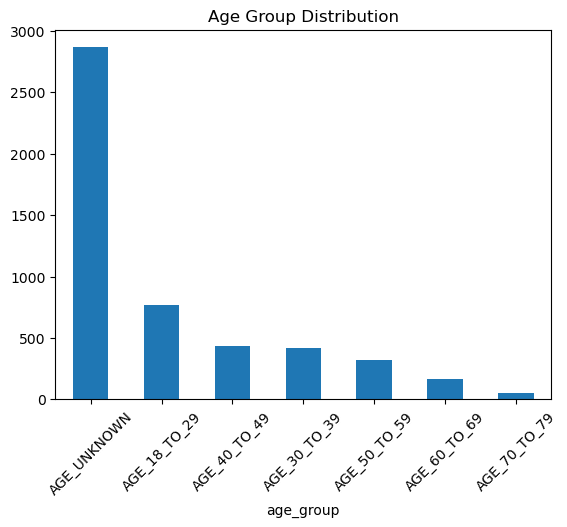

In [31]:
df['age_group'].value_counts().plot(kind='bar')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()

sex_at_birth
OTHER_OR_UNSPECIFIED    2559
FEMALE                  1666
MALE                     807
Name: count, dtype: int64


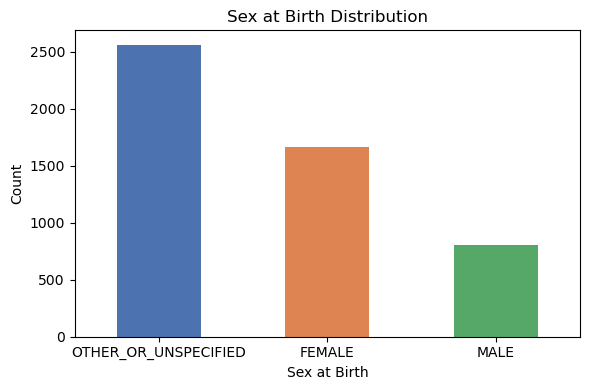

In [32]:
# Sex at birth distribution
sex_counts = df['sex_at_birth'].value_counts()
print(sex_counts)

fig, ax = plt.subplots(figsize=(6, 4))
sex_counts.plot(kind='bar', color=['#4C72B0', '#DD8452', '#55A868'], ax=ax)
ax.set_title('Sex at Birth Distribution')
ax.set_xlabel('Sex at Birth')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

fitzpatrick_skin_type
FST1               188
FST2               542
FST3               661
FST4               427
FST5               214
FST6               143
NONE_IDENTIFIED    328
Name: count, dtype: int64


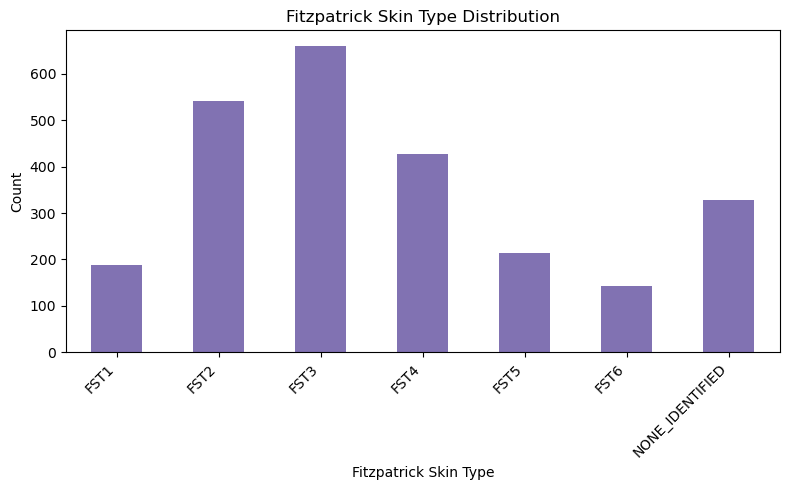

In [33]:
# Fitzpatrick skin type distribution
fitz_counts = df['fitzpatrick_skin_type'].value_counts().sort_index()
print(fitz_counts)

fig, ax = plt.subplots(figsize=(8, 5))
fitz_counts.plot(kind='bar', color='#8172B2', ax=ax)
ax.set_title('Fitzpatrick Skin Type Distribution')
ax.set_xlabel('Fitzpatrick Skin Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

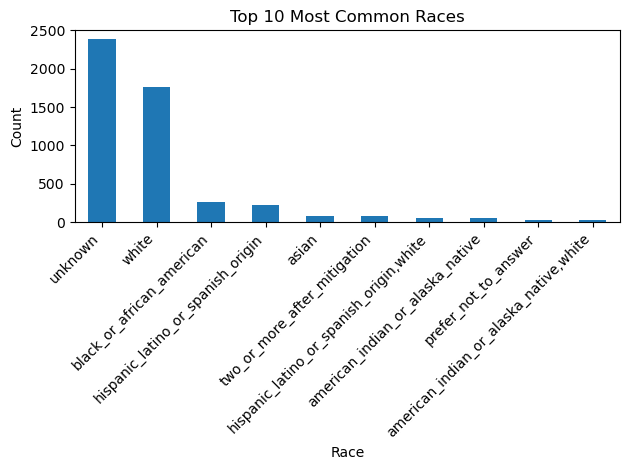

In [34]:
# Clean race column
race_clean = (
    df['combined_race']
    .fillna('unknown')
    .str.strip()
    .str.lower()
    .str.replace(' ', '_', regex=False)
)

# Top 10 races
top10 = race_clean.value_counts().nlargest(10)

plt.figure()
top10.plot(kind='bar')

plt.title('Top 10 Most Common Races')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

/var/folders/81/tp2b9h6j57j16r3g8pct1nqh0000gn/T/ipykernel_12571/1838271926.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  converted_body_parts[col] = df[col].replace({'YES': True, 'NO': False}).fillna(False).astype(int)
/var/folders/81/tp2b9h6j57j16r3g8pct1nqh0000gn/T/ipykernel_12571/1838271926.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  converted_body_parts[col] = df[col].replace({'YES': True, 'NO': False}).fillna(False).astype(int)
/var/folders/81/tp2b9h6j57j16r3g8pct1nqh0000gn/T/ipykernel_12571/1838271926.py:8: FutureWarning: Downcasting

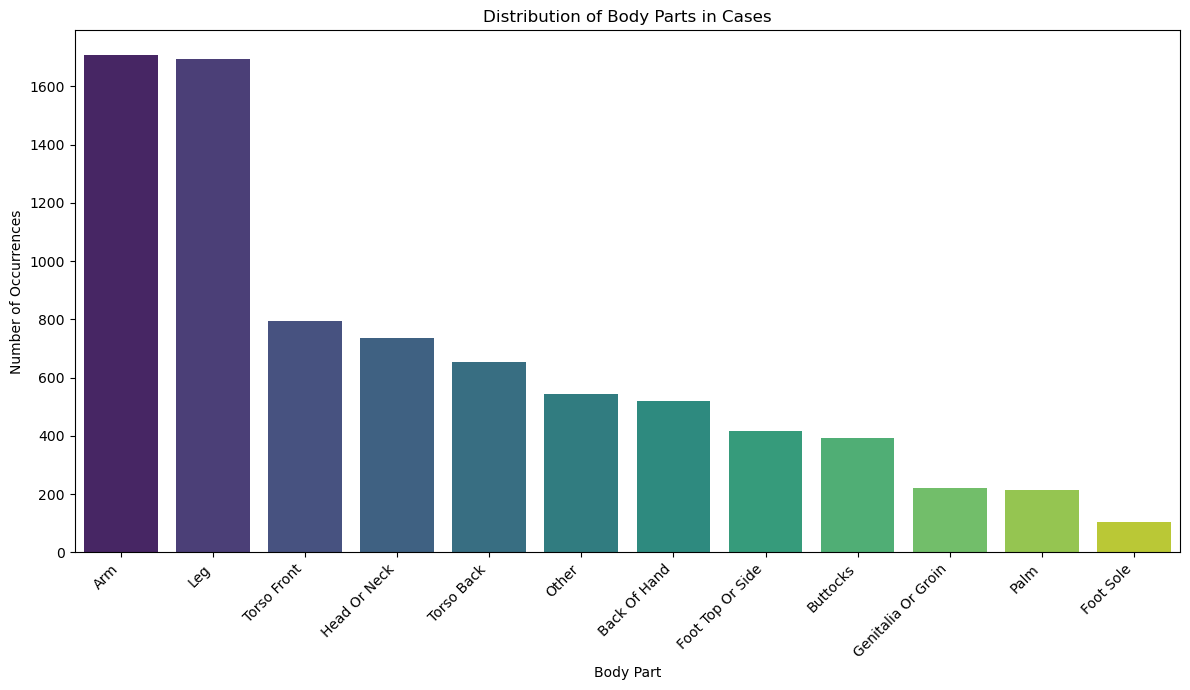

In [35]:

# Identify body part columns
body_part_columns = [col for col in df.columns if col.startswith('body_parts_')]

# Initialize a DataFrame to store the converted boolean/integer values
converted_body_parts = pd.DataFrame(index=df.index)

for col in body_part_columns:
    converted_body_parts[col] = df[col].replace({'YES': True, 'NO': False}).fillna(False).astype(int)

# Sum the occurrences for each body part from the converted DataFrame
body_part_counts = converted_body_parts.sum().sort_values(ascending=False)

# Clean up column names for better visualization
body_part_labels = [col.replace('body_parts_', '').replace('_', ' ').title() for col in body_part_counts.index]

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=body_part_labels, y=body_part_counts.values, palette='viridis')
plt.xlabel('Body Part')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Body Parts in Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

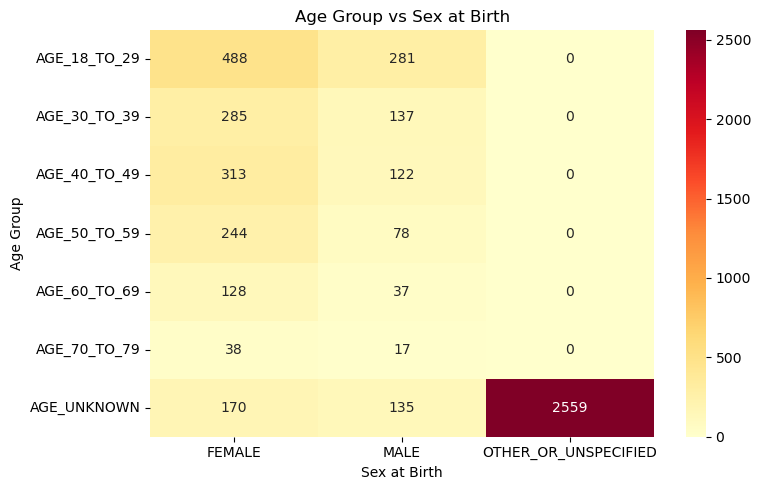

In [36]:
# Age group × Sex at birth crosstab heatmap
age_sex_ct = pd.crosstab(df['age_group'], df['sex_at_birth'])

plt.figure(figsize=(8, 5))
sns.heatmap(age_sex_ct, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Age Group vs Sex at Birth')
plt.ylabel('Age Group')
plt.xlabel('Sex at Birth')
plt.tight_layout()
plt.show()

## 4. Target Variable: Skin Conditions

Each case is labeled by dermatologists with 1–6 possible diagnoses. This multi-label nature, combined with 370+ unique conditions, creates a severe class imbalance challenge.

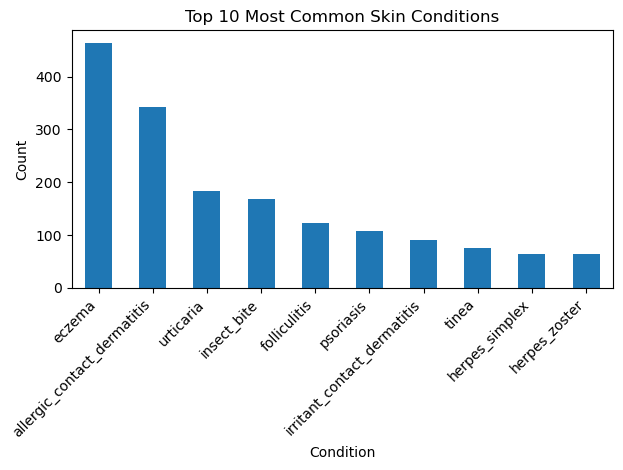

In [37]:
# most common skin conditions
conditions = combined_df['weighted_skin_condition_label'].dropna()

# Convert string dict → real dict
conditions = conditions.apply(ast.literal_eval)

# Convert each dict into rows
exploded = conditions.apply(pd.Series).stack()

# exploded = MultiIndex (row_id, condition)
exploded = exploded.reset_index()
exploded.columns = ['case_id', 'condition', 'weight']

condition_counts = (
    exploded.groupby('condition')['weight']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

condition_counts.index = (
    condition_counts.index
    .str.lower()
    .str.replace(r'[^a-z0-9]+', '_', regex=True)
    .str.strip('_')
)

import matplotlib.pyplot as plt

plt.figure()
condition_counts.plot(kind='bar')

plt.title('Top 10 Most Common Skin Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [38]:
# class imbalance
exploded['condition'].value_counts(normalize=True).head(10)

condition
Eczema                         0.139886
Allergic Contact Dermatitis    0.115644
Insect Bite                    0.053385
Urticaria                      0.043979
Psoriasis                      0.040800
Folliculitis                   0.035501
Irritant Contact Dermatitis    0.032985
Tinea                          0.027288
Drug Rash                      0.019605
Herpes Zoster                  0.018810
Name: proportion, dtype: float64

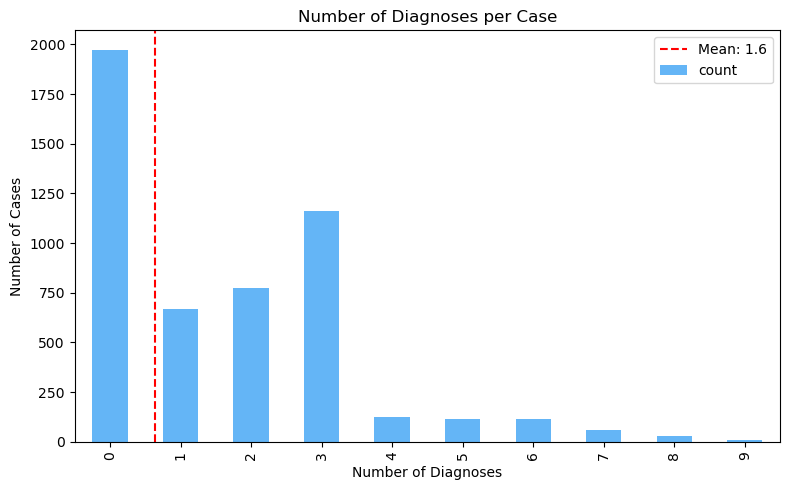

Mean diagnoses per case: 1.63
Median diagnoses per case: 1.0


In [39]:
# Number of diagnoses (labels) per case
import ast

label_lists = combined_df['dermatologist_skin_condition_on_label_name'].dropna().apply(ast.literal_eval)
labels_per_case = label_lists.apply(len)

fig, ax = plt.subplots(figsize=(8, 5))
labels_per_case.value_counts().sort_index().plot(kind='bar', color='#64B5F6', ax=ax)
ax.set_title('Number of Diagnoses per Case')
ax.set_xlabel('Number of Diagnoses')
ax.set_ylabel('Number of Cases')
ax.axvline(x=labels_per_case.mean() - 1, color='red', linestyle='--', label=f'Mean: {labels_per_case.mean():.1f}')
ax.legend()
plt.tight_layout()
plt.show()

print(f'Mean diagnoses per case: {labels_per_case.mean():.2f}')
print(f'Median diagnoses per case: {labels_per_case.median():.1f}')

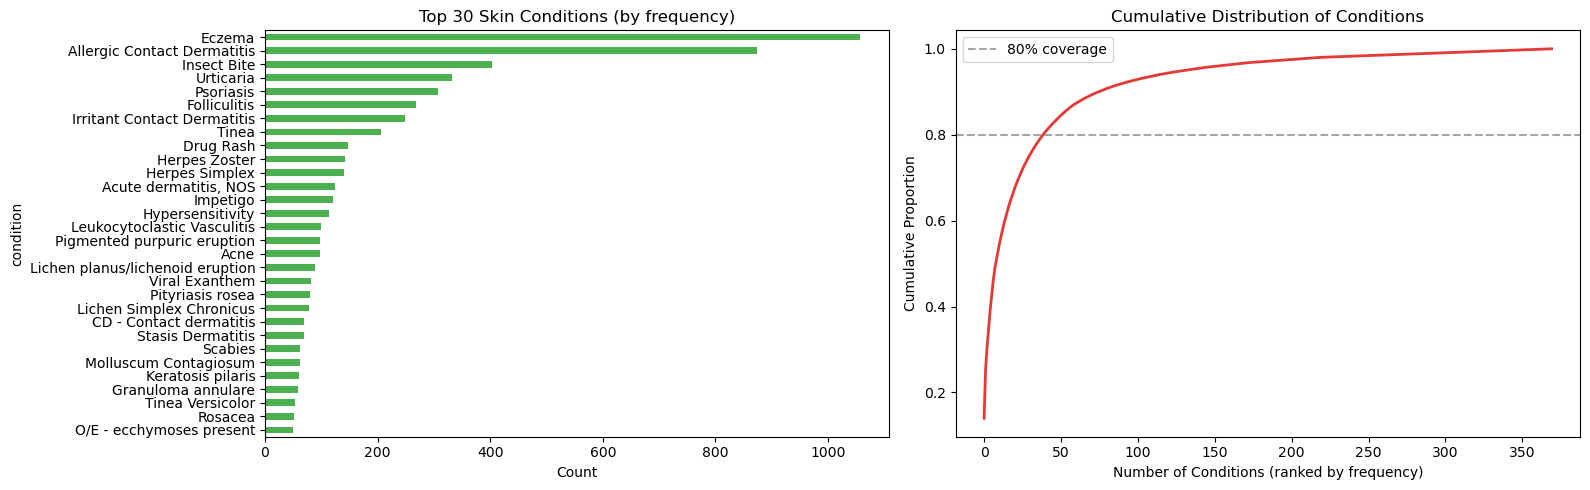

Total unique conditions: 370
Conditions covering 80% of cases: 39 (10.5%)


In [40]:
# Long tail of skin conditions — cumulative distribution
condition_freq = exploded['condition'].value_counts()
cumulative = condition_freq.cumsum() / condition_freq.sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Left: Top 30 conditions
condition_freq.head(30).plot(kind='barh', ax=ax1, color='#4CAF50')
ax1.set_title('Top 30 Skin Conditions (by frequency)')
ax1.set_xlabel('Count')
ax1.invert_yaxis()

# Right: Cumulative distribution
ax2.plot(range(len(cumulative)), cumulative.values, color='#E53935', linewidth=2)
ax2.set_title('Cumulative Distribution of Conditions')
ax2.set_xlabel('Number of Conditions (ranked by frequency)')
ax2.set_ylabel('Cumulative Proportion')
ax2.axhline(y=0.8, color='gray', linestyle='--', alpha=0.7, label='80% coverage')
ax2.legend()

plt.tight_layout()
plt.show()

n_80 = (cumulative <= 0.80).sum()
print(f'Total unique conditions: {len(condition_freq)}')
print(f'Conditions covering 80% of cases: {n_80} ({n_80/len(condition_freq)*100:.1f}%)')

## 5. Symptom Analysis

Patient-reported symptoms are key features for prediction. Understanding their prevalence and co-occurrence patterns can reveal which symptoms carry the most signal.

/var/folders/81/tp2b9h6j57j16r3g8pct1nqh0000gn/T/ipykernel_12571/530843002.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  symptom_binary = df[all_symptom_cols].replace({'YES': 1, 'NO': 0}).fillna(0).astype(int)


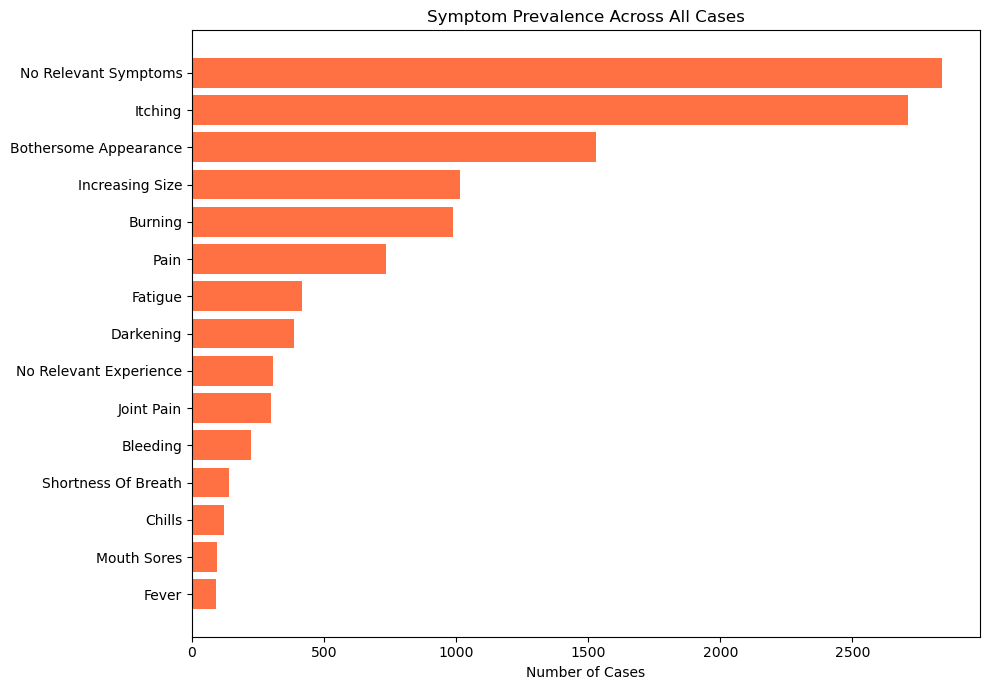

In [41]:
# Symptom prevalence
symptom_cols = [c for c in df.columns if c.startswith('condition_symptoms_')]
other_symptom_cols = [c for c in df.columns if c.startswith('other_symptoms_')]
all_symptom_cols = symptom_cols + other_symptom_cols

# Convert YES/NO to 1/0
symptom_binary = df[all_symptom_cols].replace({'YES': 1, 'NO': 0}).fillna(0).astype(int)

symptom_prevalence = symptom_binary.sum().sort_values(ascending=True)
labels = [c.replace('condition_symptoms_', '').replace('other_symptoms_', '').replace('_', ' ').title() for c in symptom_prevalence.index]

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(labels, symptom_prevalence.values, color='#FF7043')
ax.set_title('Symptom Prevalence Across All Cases')
ax.set_xlabel('Number of Cases')
plt.tight_layout()
plt.show()

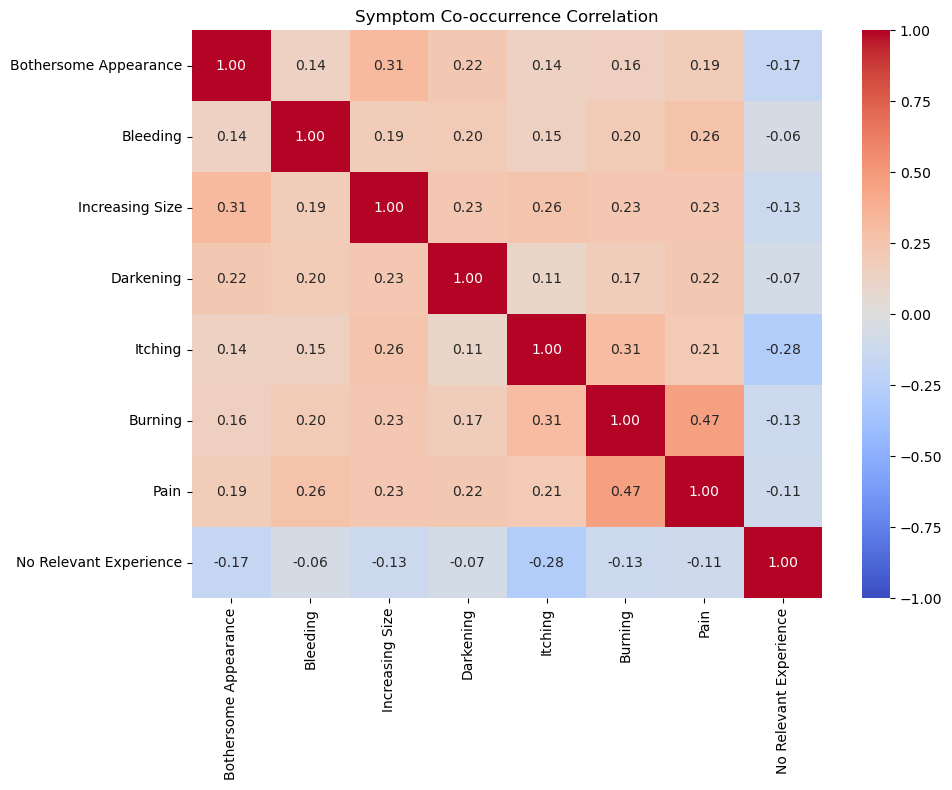

In [42]:
# Symptom co-occurrence correlation heatmap
symptom_corr = symptom_binary[symptom_cols].corr()

# Clean labels
clean_labels = [c.replace('condition_symptoms_', '').replace('_', ' ').title() for c in symptom_corr.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(symptom_corr, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=clean_labels, yticklabels=clean_labels,
            center=0, vmin=-1, vmax=1)
plt.title('Symptom Co-occurrence Correlation')
plt.tight_layout()
plt.show()

## 6. Condition Duration & Image Availability

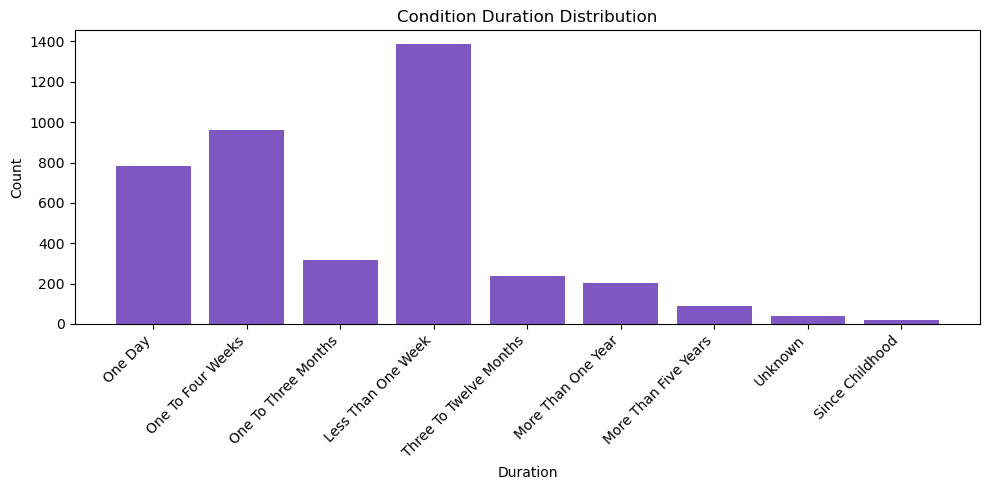

In [43]:
# Condition duration distribution
duration_order = [
    'ONE_DAY', 'TWO_TO_SIX_DAYS', 'ONE_TO_FOUR_WEEKS',
    'ONE_TO_THREE_MONTHS', 'FOUR_TO_TWELVE_MONTHS',
    'MORE_THAN_A_YEAR'
]
duration_counts = df['condition_duration'].value_counts()
# Reindex to logical order, keeping any extra values
duration_counts = duration_counts.reindex(
    [d for d in duration_order if d in duration_counts.index]
    + [d for d in duration_counts.index if d not in duration_order]
)

clean_dur_labels = [d.replace('_', ' ').title() for d in duration_counts.index]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(clean_dur_labels, duration_counts.values, color='#7E57C2')
ax.set_title('Condition Duration Distribution')
ax.set_xlabel('Duration')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

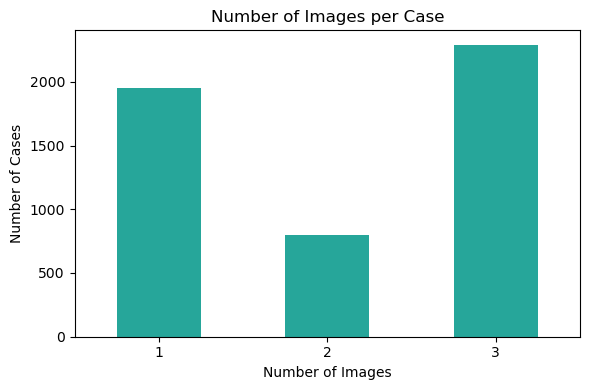

Cases with 1 image: 1948
Cases with 2 images: 796
Cases with 3 images: 2289


In [44]:
# Number of images per case
image_cols = ['image_1_path', 'image_2_path', 'image_3_path']
num_images = df[image_cols].notna().sum(axis=1)

fig, ax = plt.subplots(figsize=(6, 4))
num_images.value_counts().sort_index().plot(kind='bar', color='#26A69A', ax=ax)
ax.set_title('Number of Images per Case')
ax.set_xlabel('Number of Images')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f'Cases with 1 image: {(num_images == 1).sum()}')
print(f'Cases with 2 images: {(num_images == 2).sum()}')
print(f'Cases with 3 images: {(num_images == 3).sum()}')

/var/folders/81/tp2b9h6j57j16r3g8pct1nqh0000gn/T/ipykernel_12571/607737274.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  texture_binary = df[texture_cols].replace({'YES': 1, 'NO': 0}).fillna(0).astype(int)


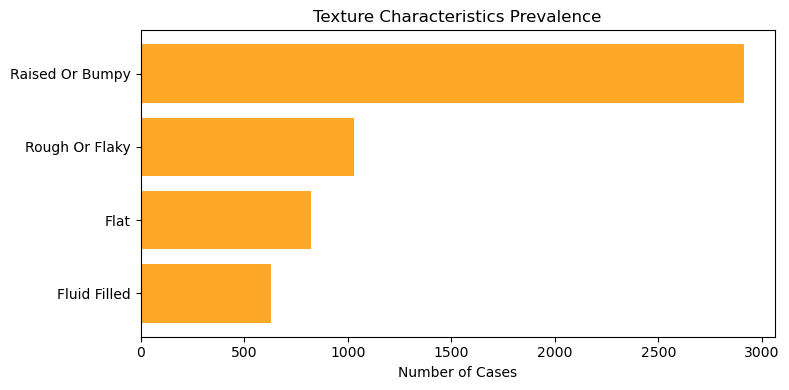

In [45]:
# Texture characteristics distribution
texture_cols = [c for c in df.columns if c.startswith('textures_')]
texture_binary = df[texture_cols].replace({'YES': 1, 'NO': 0}).fillna(0).astype(int)
texture_counts = texture_binary.sum().sort_values(ascending=True)
tex_labels = [c.replace('textures_', '').replace('_', ' ').title() for c in texture_counts.index]

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(tex_labels, texture_counts.values, color='#FFA726')
ax.set_title('Texture Characteristics Prevalence')
ax.set_xlabel('Number of Cases')
plt.tight_layout()
plt.show()

## 7. Cross-Feature Analysis

Examining how features interact with the target variable reveals patterns that inform both model design and fairness considerations.

In [46]:
# conditions vs age group
pd.crosstab(df['age_group'], exploded['condition'])

condition,AKV - Acrokeratosis verruciformis,Abrasion and/or friction burn of lower limb without infection,Abrasion of wrist,"Abrasion, scrape, or scab",Abscess,Acanthosis nigricans,Acne,Acne keloidalis,Acne urticata,Acral erythema,...,deep vein thrombosis,granular parakeratosis,panniculitis of skin,pathergy,post-sunburn peeling/superficial desquamation,relapsing polychondritis,resolving dermatitis,scurvy,varicose vein,wound/abrasion
age_group,,,,,,,,,,,,,,,,,,,,,
AGE_18_TO_29,0,1,1,6,3,0,10,1,1,0,...,0,0,1,0,0,0,0,0,0,0
AGE_30_TO_39,0,0,0,5,2,0,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AGE_40_TO_49,0,0,0,6,5,0,6,0,0,0,...,0,0,0,0,1,0,0,0,0,0
AGE_50_TO_59,0,0,1,0,1,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGE_60_TO_69,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGE_70_TO_79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGE_UNKNOWN,2,0,0,16,17,4,32,1,0,0,...,1,1,0,1,0,1,1,1,1,1


In [47]:
# condition vs sex
pd.crosstab(df['sex_at_birth'], exploded['condition'])

condition,AKV - Acrokeratosis verruciformis,Abrasion and/or friction burn of lower limb without infection,Abrasion of wrist,"Abrasion, scrape, or scab",Abscess,Acanthosis nigricans,Acne,Acne keloidalis,Acne urticata,Acral erythema,...,deep vein thrombosis,granular parakeratosis,panniculitis of skin,pathergy,post-sunburn peeling/superficial desquamation,relapsing polychondritis,resolving dermatitis,scurvy,varicose vein,wound/abrasion
sex_at_birth,,,,,,,,,,,,,,,,,,,,,
FEMALE,0,0,1,11,9,0,29,0,1,1,...,0,0,0,0,1,0,0,0,0,0
MALE,0,1,1,10,5,0,9,1,0,0,...,0,0,1,0,0,0,0,0,0,0
OTHER_OR_UNSPECIFIED,2,0,0,12,15,4,24,1,0,0,...,1,1,0,1,0,1,1,1,1,1


In [48]:
# symptoms vs conditions
pd.crosstab(df['condition_symptoms_itching'], exploded['condition'])

condition,AKV - Acrokeratosis verruciformis,Abrasion of wrist,"Abrasion, scrape, or scab",Abscess,Acanthosis nigricans,Acne,Acne keloidalis,Acne urticata,Acral erythema,Actinic Keratosis,...,Viral infection of skin,Vitiligo,Xerosis,deep fungal infection,deep vein thrombosis,granular parakeratosis,panniculitis of skin,pathergy,post-sunburn peeling/superficial desquamation,wound/abrasion
condition_symptoms_itching,,,,,,,,,,,,,,,,,,,,,
YES,2,2,22,12,2,41,2,1,1,10,...,1,4,5,1,1,1,1,1,1,1


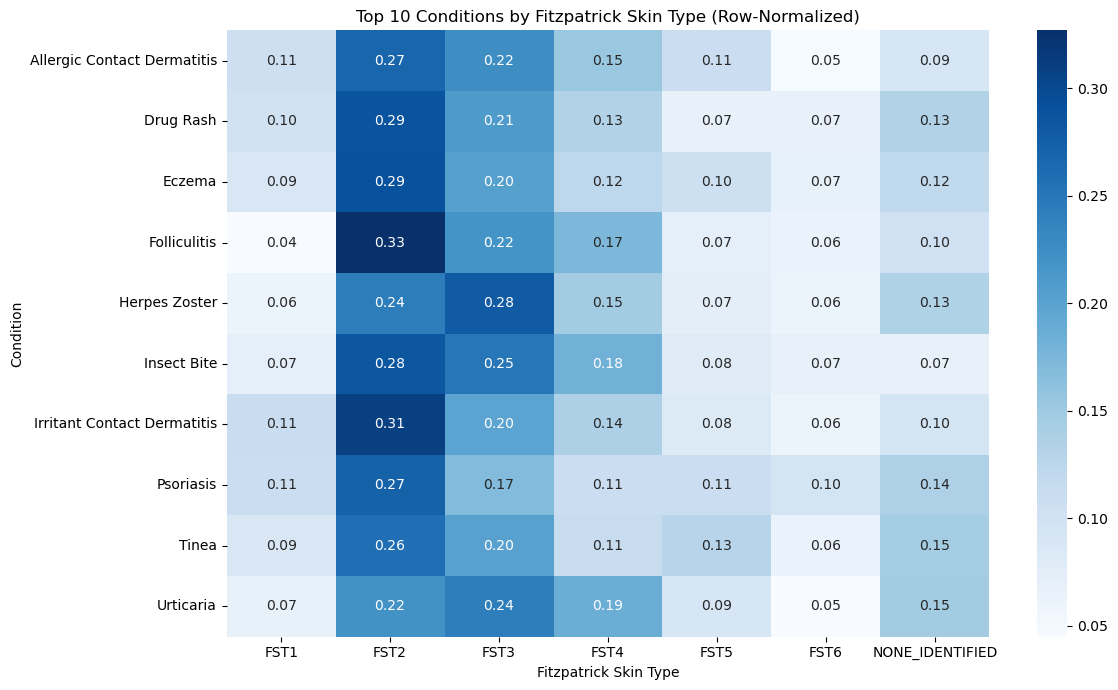

In [49]:
# Top 10 conditions by Fitzpatrick skin type
top10_conditions = exploded['condition'].value_counts().head(10).index.tolist()
exploded_top = exploded[exploded['condition'].isin(top10_conditions)]

# Merge with Fitzpatrick data
fitz_map = df[['fitzpatrick_skin_type']].copy()
fitz_map.index.name = 'case_id'
exploded_top_fitz = exploded_top.merge(fitz_map, left_on='case_id', right_index=True)

ct = pd.crosstab(exploded_top_fitz['condition'], exploded_top_fitz['fitzpatrick_skin_type'])

# Normalize by row to show proportions
ct_norm = ct.div(ct.sum(axis=1), axis=0)

plt.figure(figsize=(12, 7))
sns.heatmap(ct_norm, annot=True, fmt='.2f', cmap='Blues')
plt.title('Top 10 Conditions by Fitzpatrick Skin Type (Row-Normalized)')
plt.ylabel('Condition')
plt.xlabel('Fitzpatrick Skin Type')
plt.tight_layout()
plt.show()

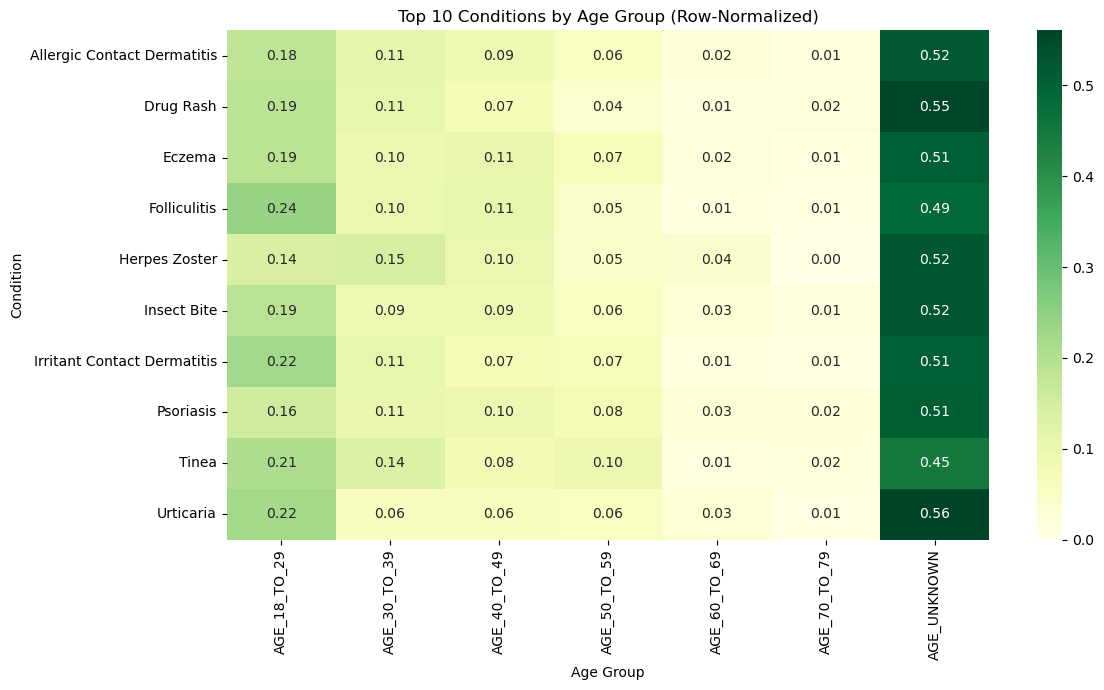

In [50]:
# Top 10 conditions by age group
age_map = df[['age_group']].copy()
age_map.index.name = 'case_id'
exploded_top_age = exploded_top.merge(age_map, left_on='case_id', right_index=True)

ct_age = pd.crosstab(exploded_top_age['condition'], exploded_top_age['age_group'])
ct_age_norm = ct_age.div(ct_age.sum(axis=1), axis=0)

plt.figure(figsize=(12, 7))
sns.heatmap(ct_age_norm, annot=True, fmt='.2f', cmap='YlGn')
plt.title('Top 10 Conditions by Age Group (Row-Normalized)')
plt.ylabel('Condition')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

/var/folders/81/tp2b9h6j57j16r3g8pct1nqh0000gn/T/ipykernel_12571/1706213775.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  symptom_df = df[symptom_cols].replace({'YES': 1, 'NO': 0}).fillna(0).astype(int)


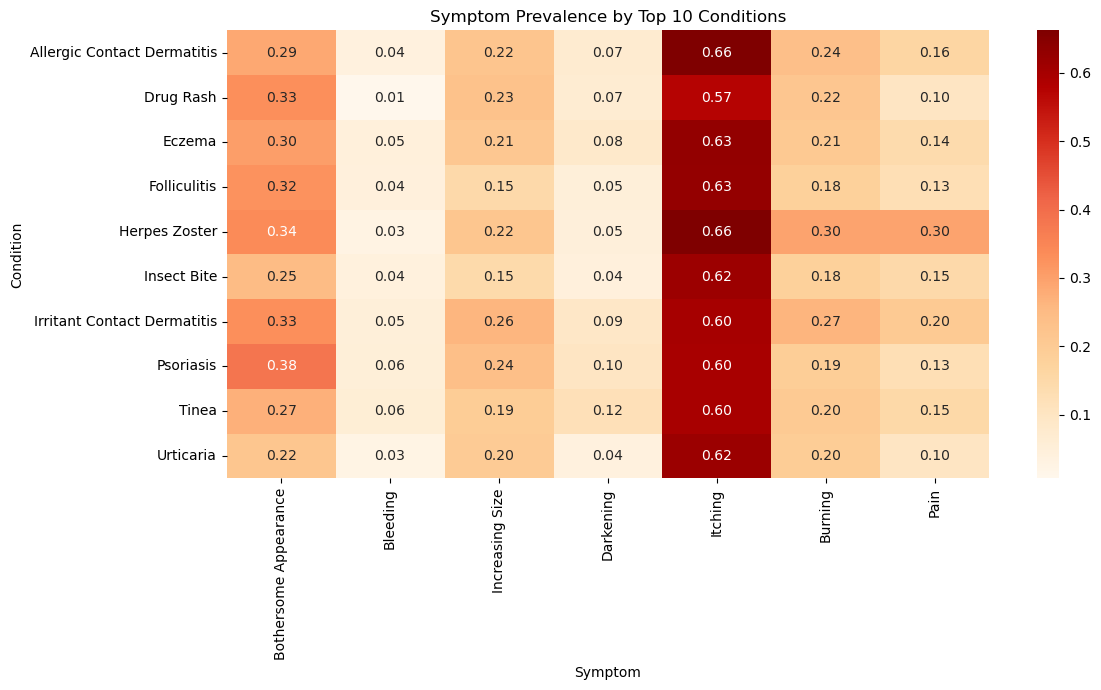

In [51]:
# Symptom profiles for top 10 conditions
symptom_cols = [c for c in df.columns if c.startswith('condition_symptoms_') and 'no_relevant' not in c]
symptom_df = df[symptom_cols].replace({'YES': 1, 'NO': 0}).fillna(0).astype(int)
symptom_df.index.name = 'case_id'

exploded_top_symp = exploded_top.merge(symptom_df, left_on='case_id', right_index=True)

# Average symptom prevalence per condition
symp_by_cond = exploded_top_symp.groupby('condition')[symptom_cols].mean()

# Clean labels
clean_symp = [c.replace('condition_symptoms_', '').replace('_', ' ').title() for c in symptom_cols]
symp_by_cond.columns = clean_symp

plt.figure(figsize=(12, 7))
sns.heatmap(symp_by_cond, annot=True, fmt='.2f', cmap='OrRd')
plt.title('Symptom Prevalence by Top 10 Conditions')
plt.ylabel('Condition')
plt.xlabel('Symptom')
plt.tight_layout()
plt.show()

## 8. Key Takeaways

1. **Severe class imbalance:** A small number of conditions dominate the dataset; the long tail of rare conditions will be hard to predict.
2. **Multi-label complexity:** Most cases have 2–3 diagnoses, requiring multi-label classification approaches.
3. **Demographic skew:** The dataset is not uniformly distributed across race, age, and skin type — models must be evaluated for fairness.
4. **Symptom signal:** Itching, bothersome appearance, and increasing size are the most commonly reported symptoms and likely carry predictive signal.
5. **Image availability:** Most cases have 3 images, providing rich visual information for embedding-based models.